In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import random
import joblib

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Load your dataframe
dff_pr = pd.read_csv('data.csv') # replace with your actual data file

# Ensure no missing values in the selected features
features = ['el_access_urban','el_demand','el_access_rural', 'population','net_imports','el_demand_pc','fin_support',
            'el_from_gas','pop_no_el_access_total', 'urban_share','income_group_num','year','el_access_total','gdp_pc',"supply_rate",'t_demand']

# Prepare the data for modeling
dff_pr = dff_pr.dropna(subset=features)

X = dff_pr[features]
y = dff_pr['gap']

# Ensure non-negative gap values if negative gaps don't make sense in context
y = y.abs()

# Store the 'entity' column separately
entities = dff_pr['entity']

# Split the data into training and test sets
X_train, X_test, y_train, y_test, entities_train, entities_test = train_test_split(X, y, entities, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Reshape data for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Print the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"entities_train shape: {entities_train.shape}")
print(f"entities_test shape: {entities_test.shape}")

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)

# Save the model
model.save('my_lstm_model.h5')

# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss}")
print(f"Test Loss: {test_loss}")

# Make predictions
y2_pred = model.predict(X_test)

# Ensure y_test and y_pred are 1-dimensional
y_test = y_test.values  # Convert y_test to a numpy array if it's a pandas Series
y2_pred = y2_pred.flatten()  # Flatten y_pred to ensure it's 1-dimensional

# Print the best prediction
best_prediction_index = np.argmin(np.abs(y_test - y2_pred))
print(f"Best Prediction: {y2_pred[best_prediction_index]} Actual: {y_test[best_prediction_index]}")


X_train shape: (839, 1, 16)
X_test shape: (210, 1, 16)
y_train shape: (839,)
y_test shape: (210,)
entities_train shape: (839,)
entities_test shape: (210,)
Epoch 1/100


c:\Users\Oalolu.adeniyi\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 254.5105 - val_loss: 341.5826
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 248.6622 - val_loss: 334.4340
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 241.6944 - val_loss: 324.3857
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 230.4783 - val_loss: 310.3607
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 215.6459 - val_loss: 292.3688
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 197.8131 - val_loss: 271.4802
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 181.0466 - val_loss: 248.6478
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 158.7488 - val_loss: 224.9488
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 139.3694 - val_loss: 201.6635
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 120.9234 - val_loss: 180.2713
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 103.1071 - val_loss: 161.6053
Epoch 12/100
21/21 ━━━━━━━━━━━

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 2.7637
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.0863  
Train Loss: 2.9296953678131104
Test Loss: 4.321759223937988
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Best Prediction: 1.1237809658050537 Actual: 1.127842084


In [2]:

# Make predictions
y_pred = model.predict(X_test).flatten()
y_pred_abs = np.abs(y_pred)  # Take absolute values of y_pred

# Create a DataFrame to compare actual vs predicted and include the 'entity' column
results_df = pd.DataFrame({
    'Entity': entities_test,
    'Actual': y_test,
    'Predicted': y_pred_abs  # Use y_pred_abs instead of y_pred
})

print(results_df.head())

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
         Entity     Actual  Predicted
352     Eritrea   0.500756   0.529259
985       Sudan  12.108912   8.196898
877  Seychelles   0.012233   0.059561
983       Sudan  14.730726   9.948538
31        Benin   2.179834   2.750083


C:\Users\Oalolu.adeniyi\AppData\Local\Temp\ipykernel_28568\610572696.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, color='r', label='Perfect Prediction')


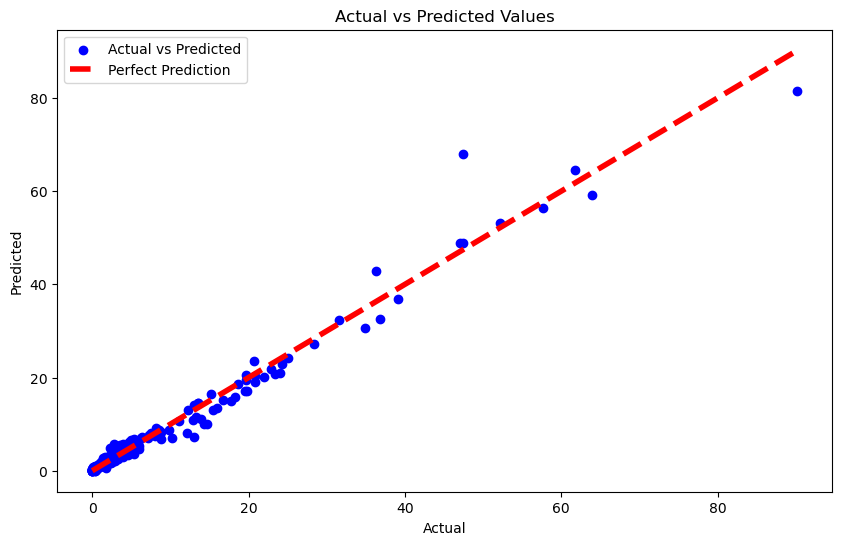

In [3]:
# Plot actual vs predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_abs, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, color='r', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.savefig("LSTM")
plt.show()